In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
%matplotlib inline 

In [2]:
# импортируем необходимые функции из библиотеки
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import settings

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [4]:
from tslearn.clustering import TimeSeriesKMeans 

# Загружаем данные

In [5]:
df_days_test = pd.read_csv(r'datasets_diff_final\test_days_diff_finall.csv', index_col="Date").T
df_days_train = pd.read_csv(r'datasets_diff_final\train_days_diff_finall.csv', index_col="Date").T
df_days_val = pd.read_csv(r'datasets_diff_final\val_days_diff_finall.csv', index_col="Date").T

In [6]:
df_hour_test = pd.read_csv(r'datasets_diff_final\test_hour_diff_finall.csv', index_col="Datetime").T
df_hour_train = pd.read_csv(r'datasets_diff_final\train_hour_diff_finall.csv', index_col="Datetime").T
df_hour_val = pd.read_csv(r'datasets_diff_final\val_hour_diff_finall.csv', index_col="Datetime").T

In [7]:
df_min_test = pd.read_csv(r'datasets_diff_final\test_min_diff_finall.csv', index_col="Datetime").T
df_min_train = pd.read_csv(r'datasets_diff_final\train_min_diff_finall.csv', index_col="Datetime").T
df_min_val = pd.read_csv(r'datasets_diff_final\val_min_diff_finall.csv', index_col="Datetime").T

In [8]:
df_days_train.head()

Date,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,...,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13
1INCH,-0.040858,-0.086056,0.037740,0.022851,-0.022676,0.002778,-0.002108,-0.032617,0.019588,0.030036,...,-0.005795,-0.010466,0.018717,-0.032393,-0.032721,-0.020895,-0.054303,-0.083449,-0.057787,-0.087139
AAVE,-0.037927,-0.111605,0.042091,0.084274,-0.035532,0.022661,-0.018792,-0.030174,0.007110,0.084608,...,-0.003807,-0.027876,0.021348,-0.061152,-0.029498,-0.006654,-0.085566,-0.123115,-0.079073,-0.164296
ABBC,-0.023599,-0.054824,-0.019712,-0.011748,-0.000465,0.069476,0.058257,0.008720,-0.073612,-0.022876,...,0.026355,-0.015054,0.046471,-0.045891,0.015863,-0.018881,-0.009104,-0.001124,-0.031321,-0.178541
ADA,-0.013521,-0.107126,0.037694,0.020469,-0.043382,0.023922,-0.002175,-0.036923,0.020997,0.017724,...,0.011455,0.001804,0.074482,0.010039,0.042520,-0.013550,-0.092751,-0.037336,-0.101155,-0.067882
ALGO,-0.044272,-0.082749,0.048340,0.028867,-0.026027,0.018042,0.007220,-0.045390,0.036626,0.030513,...,0.018090,0.008024,0.055725,-0.033152,0.044071,-0.031491,-0.086472,-0.059466,-0.057582,-0.076108


In [9]:
df_hour_train.head()

Datetime,2022-09-30 22:00:00+00:00,2022-09-30 23:00:00+00:00,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,2022-10-01 06:00:00+00:00,2022-10-01 07:00:00+00:00,...,2022-10-07 14:00:00+00:00,2022-10-07 15:00:00+00:00,2022-10-07 16:00:00+00:00,2022-10-07 17:00:00+00:00,2022-10-07 18:00:00+00:00,2022-10-07 19:00:00+00:00,2022-10-07 20:00:00+00:00,2022-10-07 21:00:00+00:00,2022-10-07 22:00:00+00:00,2022-10-07 23:00:00+00:00
1INCH,-0.003397,0.004271,0.000445,0.002971,0.001999,-0.001289,0.000093,-0.001720,0.000061,0.000919,...,-0.014048,0.012279,-0.006114,-0.009790,-0.001450,-0.000149,-0.000028,-0.006880,-0.004152,0.007040
AAVE,-0.002889,0.007501,0.002094,0.000396,0.011780,-0.002438,-0.002247,0.002458,-0.002541,0.004219,...,0.004196,-0.005897,-0.009462,-0.000499,-0.000418,0.000404,0.003226,0.000800,-0.000116,0.000368
ABBC,0.000926,0.000296,-0.000590,0.000764,0.003639,0.001220,-0.001518,0.000752,0.002858,-0.001669,...,0.001407,-0.000663,0.000115,-0.002429,0.002869,-0.000258,0.001283,0.000156,0.000809,0.000965
ADA,0.002749,0.004597,-0.000748,-0.001299,0.002703,-0.000283,-0.001242,-0.001615,-0.000913,0.001811,...,0.002542,-0.000459,-0.000546,-0.000777,0.003793,0.000006,-0.000224,-0.000362,-0.001984,0.000507
ALGO,-0.005846,0.007162,0.013806,-0.001786,0.018773,-0.005365,-0.002999,-0.000222,0.000364,0.010291,...,0.002269,-0.003292,-0.005391,-0.003945,0.000052,0.005138,-0.000399,0.003410,0.000709,0.001257


Произоводим небольшую обработку данных

In [10]:
count = np.isinf(df_days_test).values.sum()
count

2

In [11]:
df_days_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
df_days_test.dropna(inplace=True)

# Feature extraction

In [13]:
# Возьмем минимальный набор признаков, которые можно извлечь
settings_minimal = settings.MinimalFCParameters()
settings_minimal

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [14]:
settings_time = settings.TimeBasedFCParameters()
settings_time.update(settings_minimal)
settings_time

{'linear_trend_timewise': [{'attr': 'pvalue'}, {'attr': 'rvalue'}, {'attr': 'intercept'}, {'attr': 'slope'}, {'attr': 'stderr'}], 'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [15]:
settings_efficient = settings.EfficientFCParameters()
settings_efficient

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'maximum': None, 'absolu

In [16]:
# Самый широкий набор признаков
settings_comprehensive = settings.ComprehensiveFCParameters()
len(settings_comprehensive)

76

# Дневные данные

Возьмем эффективный список параметров и построим с его помощью новое признаковое пространство

In [36]:
data_long = pd.DataFrame({0: df_days_train.values.flatten(),
                          1: np.arange(df_days_train.shape[0]).repeat(df_days_train.shape[1])})
print(data_long.shape)
data_long.head()

(12610, 2)


,0,1
0,-0.040858,0
1,-0.086056,0
2,0.037740,0
3,0.022851,0
4,-0.022676,0


In [37]:
X_minimal = extract_features(data_long, column_id=1, impute_function=impute, default_fc_parameters=settings_minimal)

Feature Extraction: 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]


In [38]:
X_efficient = extract_features(data_long, column_id=1, impute_function=impute, default_fc_parameters=settings_efficient)

Feature Extraction: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


In [39]:
X_comprehensive = extract_features(data_long, column_id=1, impute_function=impute, default_fc_parameters=settings_comprehensive)

Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  1.70it/s]


In [40]:
X_time = extract_features(data_long, column_id=1, impute_function=impute, default_fc_parameters=settings_time)

Feature Extraction: 100%|██████████| 20/20 [00:07<00:00,  2.86it/s]


Кластеризуем

In [41]:
# считаем метрики
n_clusters_list = [2,3, 4, 5,10,20,30,40,50,60,70,80,90,100] 

silhouette_list = list()
davies_bouldin_list = list()
calinski_harabasz_list = list()

for i in n_clusters_list:
    
    labels = KMeans(n_clusters=i).fit_predict(df_days_train)
    silhouette_list.append(silhouette_score(df_days_train, labels))
    davies_bouldin_list.append(davies_bouldin_score(df_days_train, labels))
    calinski_harabasz_list.append(calinski_harabasz_score(df_days_train, labels))

Text(0.5, 1.0, 'Зависимость индекса Калински-Харабаша от числа кластеров')

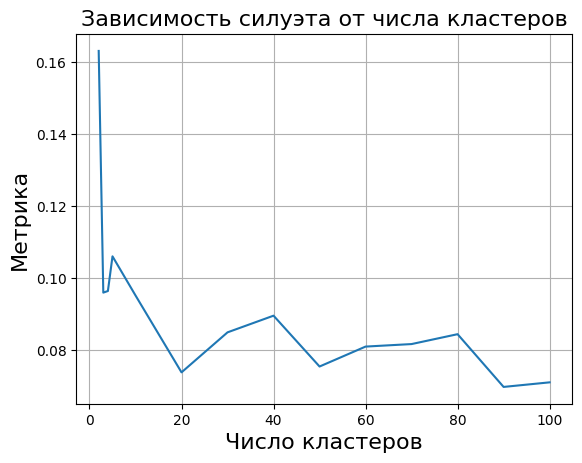

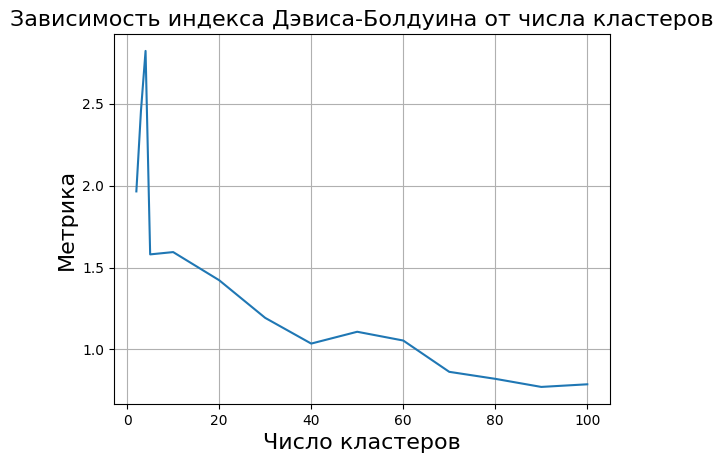

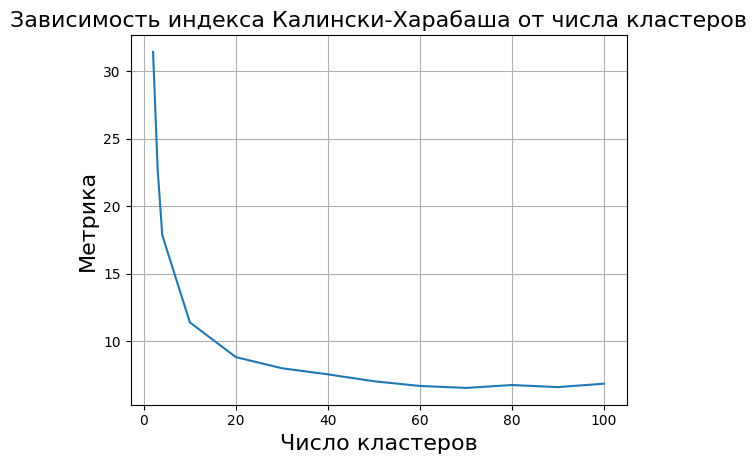

In [42]:
# визуализируем метрики
fig, ax = plt.subplots()
ax.plot(n_clusters_list,silhouette_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость силуэта от числа кластеров', fontsize=16)

fig, ax = plt.subplots()
ax.plot(n_clusters_list,davies_bouldin_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость индекса Дэвиса-Болдуина от числа кластеров', fontsize=16)

fig, ax = plt.subplots()
ax.plot(n_clusters_list,calinski_harabasz_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость индекса Калински-Харабаша от числа кластеров', fontsize=16)

In [46]:
best_k = 2

best_silhouette = silhouette_list[n_clusters_list.index(best_k)]
best_davies_bouldin = davies_bouldin_list[n_clusters_list.index(best_k)]
best_calinski_harabasz =  calinski_harabasz_list[n_clusters_list.index(best_k)]

print('Наилучшие результаты:')
print('Оптимальное число кластеров: '+str(best_k))
print('наилучший силуэт: '+str(best_silhouette))
print('наилучший индекс Д-Б: '+str(best_davies_bouldin))
print('наилучший индекс К-Х: '+str(best_calinski_harabasz))

Наилучшие результаты:
Оптимальное число кластеров: 2
наилучший силуэт: 0.16312902438299906
наилучший индекс Д-Б: 1.9643065454041122
наилучший индекс К-Х: 31.439511757584807


In [47]:
model_day = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) 

In [48]:
model_day.fit(X_efficient)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [49]:
TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [50]:
df_days_train.index[model_day.labels_== 0] 

Index(['1INCH', 'AAVE', 'ABBC', 'ADA', 'ALGO', 'AMP', 'ANKR', 'API3', 'APT',
       'AR',
       ...
       'XMR', 'XNO', 'XRP', 'XTZ', 'XYM', 'YFI', 'ZEC', 'ZEN', 'ZIL', 'ZRX'],
      dtype='object', length=193)

In [51]:
df_days_train.index[model_day.labels_== 1] 

Index(['USDC'], dtype='object')

Посмотрим на внешний вид временных рядов (в стандартизованном виде) для разных кластеров

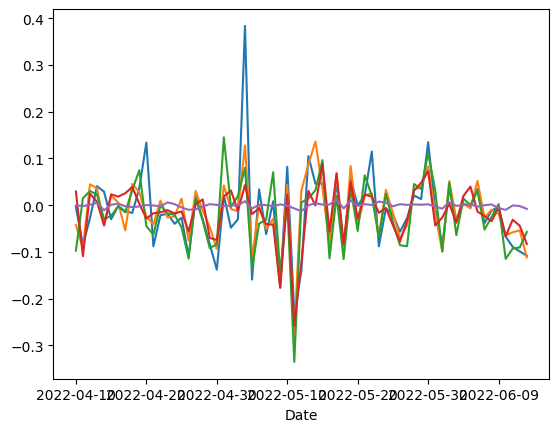

In [52]:
for i in np.random.randint(0, df_days_train.index[model_day.labels_==0].shape[0], size=5):
  index_name = df_days_train.index[model_day.labels_==0][i]
  df_days_train.loc[index_name].plot(legend=False)

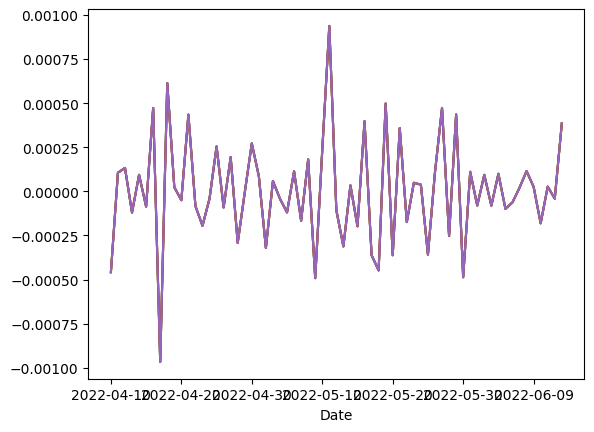

In [54]:
for i in np.random.randint(0, df_days_train.index[model_day.labels_==1].shape[0], size=5):
  index_name = df_days_train.index[model_day.labels_==1][i]
  df_days_train.loc[index_name].plot(legend=False)

Попробуем провести кластеризацию на другом наборе фичей

In [55]:
model_day_min = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) 

In [56]:
model_day_min.fit(X_minimal)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [57]:
TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [58]:
df_days_train.index[model_day_min.labels_== 0] 

Index(['ABBC', 'ADA', 'ALGO', 'ARDR', 'BNB', 'BNX', 'BSV', 'BTC', 'BTCB',
       'BTG', 'BTRST', 'BTT', 'BTTOLD', 'BUSD', 'CAKE', 'CHSB', 'CHZ', 'CVC',
       'DAI', 'DAO', 'DCR', 'ENS', 'ERG', 'EURS', 'EWT', 'FEI', 'FTT', 'GLM',
       'GT', 'GUSD', 'HIVE', 'HNT', 'HT', 'HUM', 'HUSD', 'IOST', 'JST', 'KAVA',
       'KCS', 'KNC', 'LEO', 'LINK', 'LRC', 'LSK', 'MANA', 'MED', 'MXC', 'NEO',
       'OKB', 'OMG', 'ONE', 'ONT', 'OP', 'PAXG', 'POLY', 'PUNDIX', 'QNT',
       'QTUM', 'RSR', 'SNT', 'SNX', 'TRX', 'TUSD', 'TWT', 'UNI', 'UQC', 'USDC',
       'USDN', 'USDP', 'USDT', 'VERI', 'VGX', 'WBTC', 'WEMIX', 'XCH', 'XDC',
       'XEC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'ZEC'],
      dtype='object')

In [60]:
df_days_train.index[model_day_min.labels_== 1] 

Index(['1INCH', 'AAVE', 'AMP', 'ANKR', 'API3', 'APT', 'AR', 'ASTR', 'ATOM',
       'AUDIO',
       ...
       'VVS', 'WAXP', 'WIN', 'WOO', 'XNO', 'XYM', 'YFI', 'ZEN', 'ZIL', 'ZRX'],
      dtype='object', length=111)

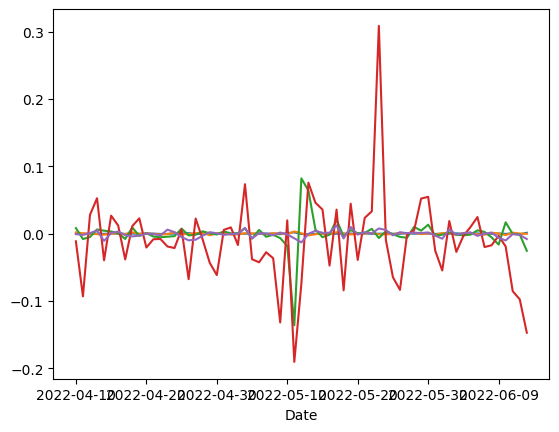

In [62]:
for i in np.random.randint(0, df_days_train.index[model_day_min.labels_==0].shape[0], size=5):
  index_name = df_days_train.index[model_day_min.labels_==0][i]
  df_days_train.loc[index_name].plot(legend=False)

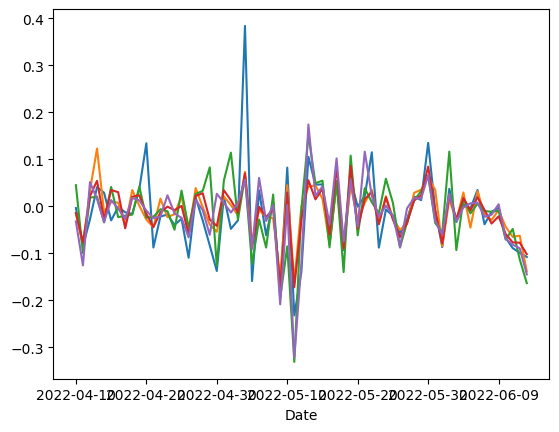

In [63]:
for i in np.random.randint(0, df_days_train.index[model_day_min.labels_==1].shape[0], size=5):
  index_name = df_days_train.index[model_day_min.labels_==1][i]
  df_days_train.loc[index_name].plot(legend=False)

# Часовые котировки

Возьмем эффективный список параметров и построим с его помощью новое признаковое пространство

In [17]:
data_long_h = pd.DataFrame({0: df_hour_train.values.flatten(),
                          1: np.arange(df_hour_train.shape[0]).repeat(df_hour_train.shape[1])})
print(data_long_h.shape)
data_long_h.head()

(32980, 2)


,0,1
0,-0.003397,0
1,0.004271,0
2,0.000445,0
3,0.002971,0
4,0.001999,0


In [18]:
X_minimal_h = extract_features(data_long_h, column_id=1, impute_function=impute, default_fc_parameters=settings_minimal)

Feature Extraction: 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]


In [19]:
X_efficient_h = extract_features(data_long_h, column_id=1, impute_function=impute, default_fc_parameters=settings_efficient)

Feature Extraction: 100%|██████████| 20/20 [00:12<00:00,  1.66it/s]


In [20]:
X_comprehensive_h = extract_features(data_long_h, column_id=1, impute_function=impute, default_fc_parameters=settings_comprehensive)

Feature Extraction: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


In [21]:
X_time_h = extract_features(data_long_h, column_id=1, impute_function=impute, default_fc_parameters=settings_time)

Feature Extraction: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


In [22]:
X_minimal_h

,0__sum_values,0__median,0__mean,0__length,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,0.069500,0.000146,0.000409,170.0,0.007232,0.000052,0.007244,0.079898,0.079898,-0.016452
1,0.023972,-0.000088,0.000141,170.0,0.004850,0.000024,0.004852,0.015132,0.016439,-0.016439
2,-0.090270,-0.000280,-0.000531,170.0,0.002958,0.000009,0.003006,0.010529,0.011114,-0.011114
3,-0.015070,-0.000130,-0.000089,170.0,0.003326,0.000011,0.003327,0.008936,0.015318,-0.015318
4,-0.028147,-0.000197,-0.000166,170.0,0.005466,0.000030,0.005469,0.018773,0.018773,-0.017039
...,...,...,...,...,...,...,...,...,...,...
189,-0.022608,-0.000328,-0.000133,170.0,0.004186,0.000018,0.004189,0.014797,0.018096,-0.018096
190,-0.030146,-0.000252,-0.000177,170.0,0.004084,0.000017,0.004088,0.017802,0.017802,-0.017607
191,-0.149630,0.000405,-0.000880,170.0,0.033800,0.001142,0.033811,0.104456,0.235691,-0.235691
192,0.024048,-0.000295,0.000141,170.0,0.003951,0.000016,0.003953,0.012705,0.015482,-0.015482


Кластеризация

In [23]:
# считаем метрики
n_clusters_list = [2,3, 4, 5,10,20,30,40,50,60,70,80,90,100] 

silhouette_list = list()
davies_bouldin_list = list()
calinski_harabasz_list = list()

for i in n_clusters_list:
    
    labels = KMeans(n_clusters=i).fit_predict(df_hour_train)
    silhouette_list.append(silhouette_score(df_hour_train, labels))
    davies_bouldin_list.append(davies_bouldin_score(df_hour_train, labels))
    calinski_harabasz_list.append(calinski_harabasz_score(df_hour_train, labels))

Text(0.5, 1.0, 'Зависимость индекса Калински-Харабаша от числа кластеров')

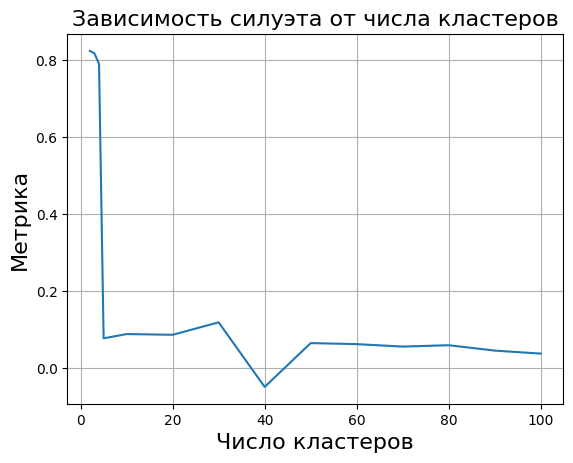

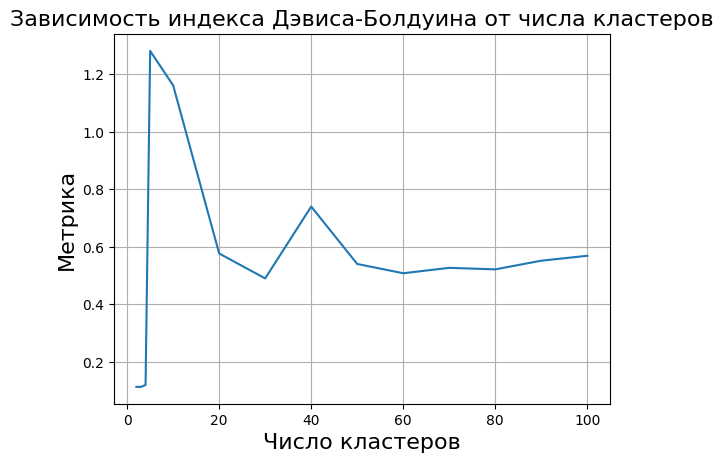

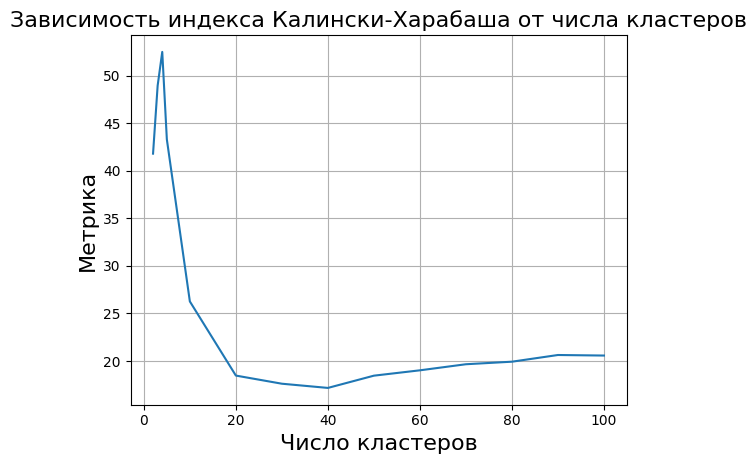

In [24]:
# визуализируем метрики
fig, ax = plt.subplots()
ax.plot(n_clusters_list,silhouette_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость силуэта от числа кластеров', fontsize=16)

fig, ax = plt.subplots()
ax.plot(n_clusters_list,davies_bouldin_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость индекса Дэвиса-Болдуина от числа кластеров', fontsize=16)

fig, ax = plt.subplots()
ax.plot(n_clusters_list,calinski_harabasz_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость индекса Калински-Харабаша от числа кластеров', fontsize=16)

In [28]:
best_k = 2

best_silhouette = silhouette_list[n_clusters_list.index(best_k)]
best_davies_bouldin = davies_bouldin_list[n_clusters_list.index(best_k)]
best_calinski_harabasz =  calinski_harabasz_list[n_clusters_list.index(best_k)]

print('Наилучшие результаты:')
print('Оптимальное число кластеров: '+str(best_k))
print('наилучший силуэт: '+str(best_silhouette))
print('наилучший индекс Д-Б: '+str(best_davies_bouldin))
print('наилучший индекс К-Х: '+str(best_calinski_harabasz))

Наилучшие результаты:
Оптимальное число кластеров: 2
наилучший силуэт: 0.8247144137516201
наилучший индекс Д-Б: 0.11355527001003936
наилучший индекс К-Х: 41.78883093309178


In [29]:
model_hour = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) 

In [30]:
model_hour.fit(X_efficient_h)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [31]:
TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [32]:
df_hour_train.index[model_hour.labels_== 0] 

Index(['1INCH', 'AAVE', 'ABBC', 'ADA', 'ALGO', 'AMP', 'ANKR', 'APE', 'API3',
       'APT',
       ...
       'XNO', 'XRP', 'XTZ', 'XYM', 'YFI', 'ZEC', 'ZEN', 'ZEON', 'ZIL', 'ZRX'],
      dtype='object', length=193)

In [33]:
df_hour_train.index[model_hour.labels_== 1] 

Index(['USDT'], dtype='object')

Посмотрим на внешний вид временных рядов (в стандартизованном виде) для разных кластеров

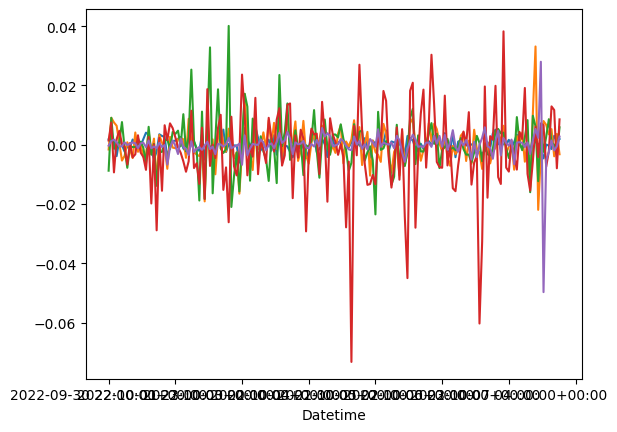

In [34]:
for i in np.random.randint(0, df_hour_train.index[model_hour.labels_==0].shape[0], size=5):
  index_name = df_hour_train.index[model_hour.labels_==0][i]
  df_hour_train.loc[index_name].plot(legend=False)

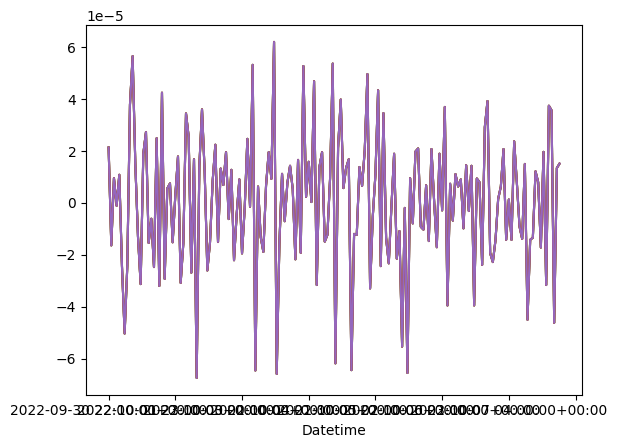

In [35]:
for i in np.random.randint(0, df_hour_train.index[model_hour.labels_==1].shape[0], size=5):
  index_name = df_hour_train.index[model_hour.labels_==1][i]
  df_hour_train.loc[index_name].plot(legend=False)

Попробуем провести кластеризацию на другом наборе фичей

In [96]:
model_hour_m = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) 

In [97]:
model_hour_m.fit(X_minimal_h)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [98]:
TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [99]:
df_hour_train.index[model_hour_m.labels_== 0] 

Index(['1INCH', 'AAVE', 'ABBC', 'ADA', 'ALGO', 'AMP', 'ANKR', 'APE', 'API3',
       'APT',
       ...
       'XNO', 'XRP', 'XTZ', 'XYM', 'YFI', 'ZEC', 'ZEN', 'ZEON', 'ZIL', 'ZRX'],
      dtype='object', length=182)

In [100]:
df_hour_train.index[model_hour_m.labels_== 1] 

Index(['CHSB', 'CSPR', 'DESO', 'EGLD', 'FXS', 'INJ', 'MKR', 'PAC', 'PYR',
       'SOLO', 'SUSHI', 'VERI'],
      dtype='object')

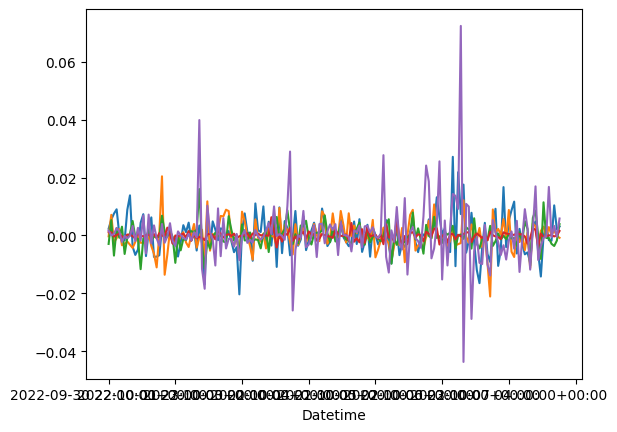

In [101]:
for i in np.random.randint(0, df_hour_train.index[model_hour_m.labels_==0].shape[0], size=5):
  index_name = df_hour_train.index[model_hour_m.labels_==0][i]
  df_hour_train.loc[index_name].plot(legend=False)

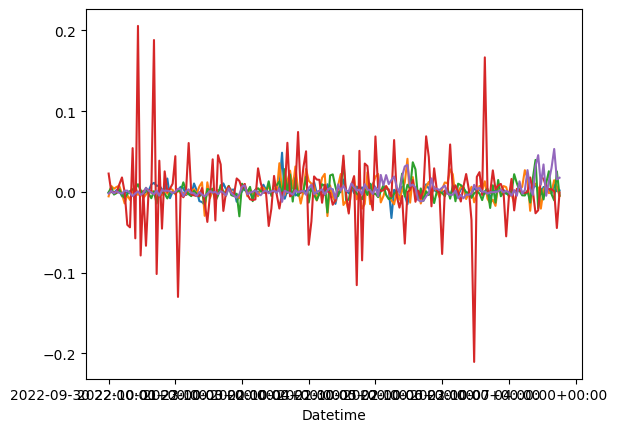

In [104]:
for i in np.random.randint(0, df_hour_train.index[model_hour_m.labels_==1].shape[0], size=5):
  index_name = df_hour_train.index[model_hour_m.labels_==1][i]
  df_hour_train.loc[index_name].plot(legend=False)

# Минутные котировки

In [64]:
data_long_m = pd.DataFrame({0: df_min_train.values.flatten(),
                          1: np.arange(df_min_train.shape[0]).repeat(df_min_train.shape[1])})
print(data_long_m.shape)
data_long_m.head()

(264000, 2)


,0,1
0,0.000138,0
1,-0.000029,0
2,-0.000026,0
3,-0.000682,0
4,0.000045,0


In [65]:
X_minimal_m = extract_features(data_long_m, column_id=1, impute_function=impute, default_fc_parameters=settings_minimal)

Feature Extraction: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]


In [66]:
X_efficient_m = extract_features(data_long_m, column_id=1, impute_function=impute, default_fc_parameters=settings_efficient)

Feature Extraction: 100%|██████████| 20/20 [00:42<00:00,  2.12s/it]


In [67]:
X_comprehensive_m = extract_features(data_long_m, column_id=1, impute_function=impute, default_fc_parameters=settings_comprehensive)

Feature Extraction: 100%|██████████| 20/20 [04:08<00:00, 12.43s/it]


In [68]:
X_time_m = extract_features(data_long_m, column_id=1, impute_function=impute, default_fc_parameters=settings_time)

Feature Extraction: 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]


Кластеризация

In [69]:
# считаем метрики
n_clusters_list = [2,3, 4, 5,10,20,30,40,50,60,70,80,90,100] 

silhouette_list = list()
davies_bouldin_list = list()
calinski_harabasz_list = list()

for i in n_clusters_list:
    
    labels = KMeans(n_clusters=i).fit_predict(df_min_train)
    silhouette_list.append(silhouette_score(df_min_train, labels))
    davies_bouldin_list.append(davies_bouldin_score(df_min_train, labels))
    calinski_harabasz_list.append(calinski_harabasz_score(df_min_train, labels))

Text(0.5, 1.0, 'Зависимость индекса Калински-Харабаша от числа кластеров')

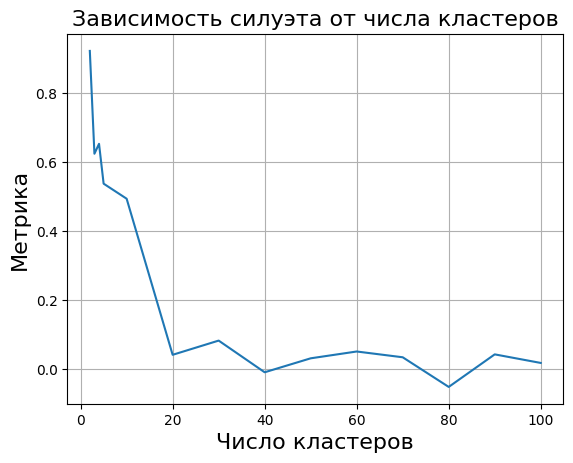

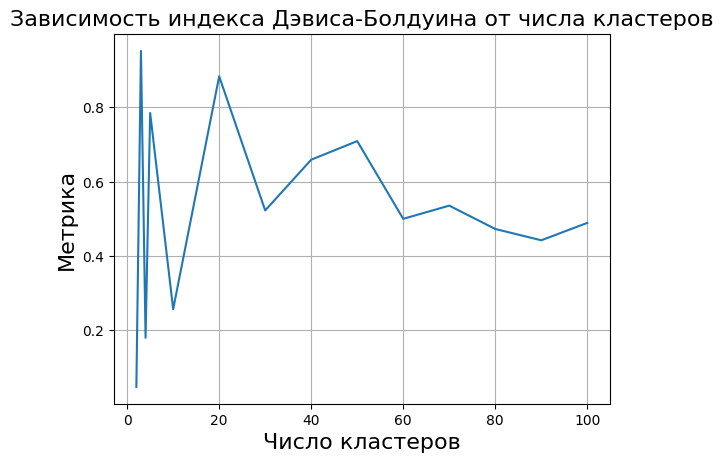

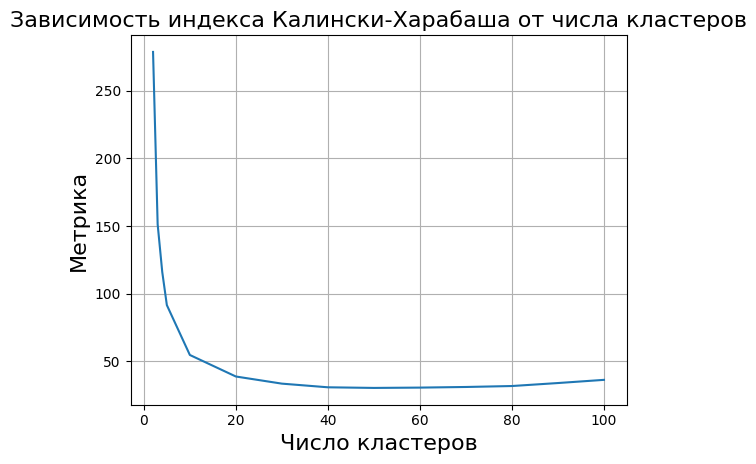

In [70]:
# визуализируем метрики
fig, ax = plt.subplots()
ax.plot(n_clusters_list,silhouette_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость силуэта от числа кластеров', fontsize=16)

fig, ax = plt.subplots()
ax.plot(n_clusters_list,davies_bouldin_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость индекса Дэвиса-Болдуина от числа кластеров', fontsize=16)

fig, ax = plt.subplots()
ax.plot(n_clusters_list,calinski_harabasz_list)
plt.xlabel('Число кластеров' , size=16)
plt.grid()
plt.ylabel('Метрика', size=16)
plt.title('Зависимость индекса Калински-Харабаша от числа кластеров', fontsize=16)

In [78]:
best_k = 2

best_silhouette = silhouette_list[n_clusters_list.index(best_k)]
best_davies_bouldin = davies_bouldin_list[n_clusters_list.index(best_k)]
best_calinski_harabasz =  calinski_harabasz_list[n_clusters_list.index(best_k)]

print('Наилучшие результаты:')
print('Оптимальное число кластеров: '+str(best_k))
print('наилучший силуэт: '+str(best_silhouette))
print('наилучший индекс Д-Б: '+str(best_davies_bouldin))
print('наилучший индекс К-Х: '+str(best_calinski_harabasz))

Наилучшие результаты:
Оптимальное число кластеров: 2
наилучший силуэт: 0.9215289743490577
наилучший индекс Д-Б: 0.047941143656722356
наилучший индекс К-Х: 278.65680653681727


In [79]:
model_min = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) 

In [83]:
model_min.fit(X_efficient_m)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\tslearn\barycenters\dba.py:599: ConvergenceWarning: DBA loss is increasing while it should not be. Stopping optimization.
  warnings.warn("DBA loss is increasing while it should not be. "


TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [84]:
TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [85]:
df_min_train.index[model_min.labels_== 0] 

Index(['1INCH', 'AAVE', 'ABBC', 'ADA', 'ALGO', 'AMP', 'ANKR', 'API3', 'APT',
       'AR',
       ...
       'XLM', 'XMR', 'XNO', 'XRP', 'XTZ', 'YFI', 'ZEN', 'ZEON', 'ZIL', 'ZRX'],
      dtype='object', length=174)

In [86]:
df_min_train.index[model_min.labels_== 1] 

Index(['USDT', 'vUSDC'], dtype='object')

Посмотрим на внешний вид временных рядов (в стандартизованном виде) для разных кластеров

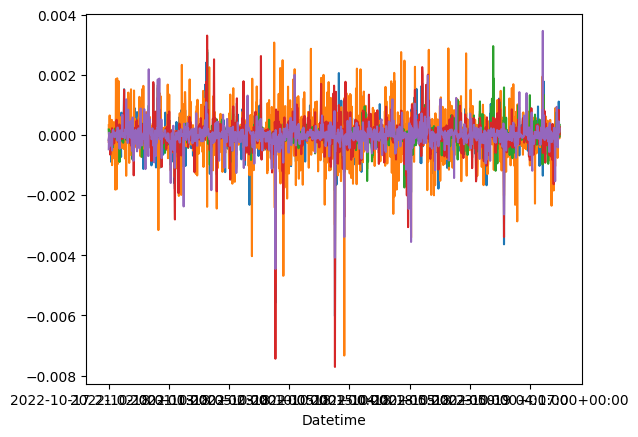

In [87]:
for i in np.random.randint(0, df_min_train.index[model_min.labels_==0].shape[0], size=5):
  index_name = df_min_train.index[model_min.labels_==0][i]
  df_min_train.loc[index_name].plot(legend=False)

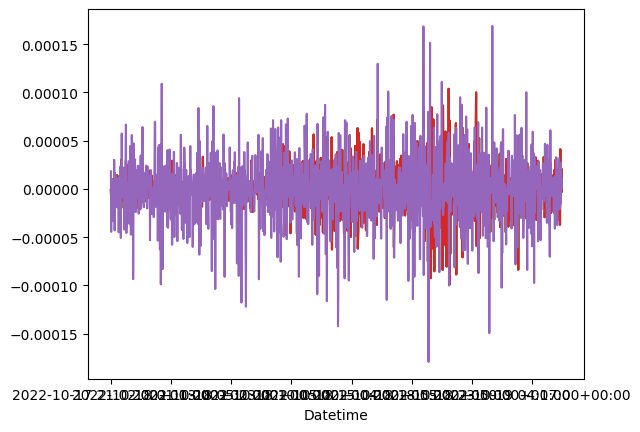

In [88]:
for i in np.random.randint(0, df_min_train.index[model_min.labels_==1].shape[0], size=5):
  index_name = df_min_train.index[model_min.labels_==1][i]
  df_min_train.loc[index_name].plot(legend=False)

Попробуем провести кластеризацию на другом наборе фичей

In [89]:
model_min_m = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) 

In [90]:
model_min_m.fit(X_minimal_m)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [91]:
TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

TimeSeriesKMeans(metric='dtw', n_clusters=2, random_state=42)

In [92]:
df_min_train.index[model_min_m.labels_== 0] 

Index(['1INCH', 'AAVE', 'ABBC', 'ADA', 'ALGO', 'AMP', 'ANKR', 'API3', 'AR',
       'ARDR',
       ...
       'XLM', 'XMR', 'XNO', 'XRP', 'XTZ', 'YFI', 'ZEN', 'ZEON', 'ZIL', 'ZRX'],
      dtype='object', length=175)

In [93]:
df_min_train.index[model_min_m.labels_== 1] 

Index(['APT'], dtype='object')

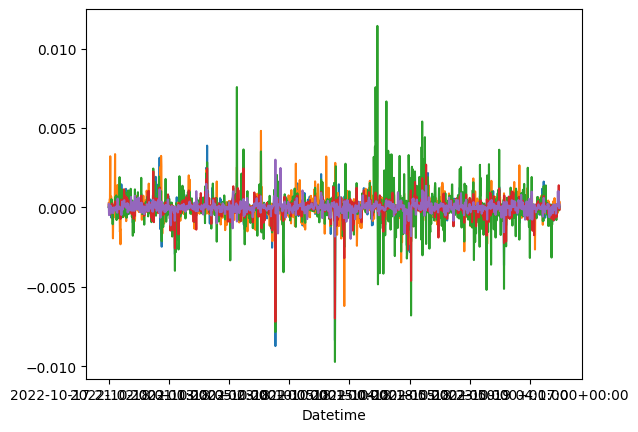

In [94]:
for i in np.random.randint(0, df_min_train.index[model_min_m.labels_==0].shape[0], size=5):
  index_name = df_min_train.index[model_min_m.labels_==0][i]
  df_min_train.loc[index_name].plot(legend=False)

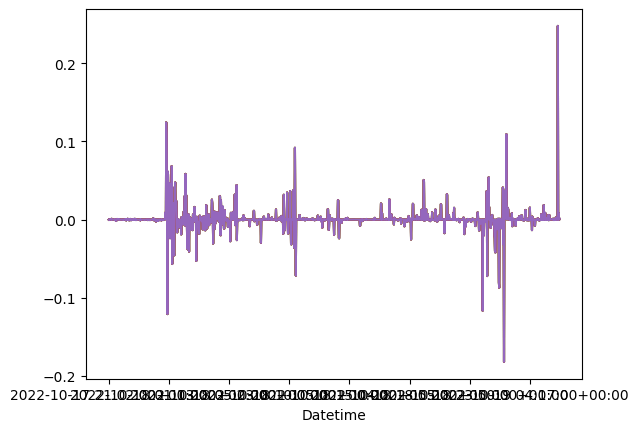

In [95]:
for i in np.random.randint(0, df_min_train.index[model_min_m.labels_==1].shape[0], size=5):
  index_name = df_min_train.index[model_min_m.labels_==1][i]
  df_min_train.loc[index_name].plot(legend=False)

# Вывод

Во всех моделях на разных временных отрезках оптимальное количество кластеров равняется двум. 

При этом кластеры разделяются плохо, даже несмотря на то, что на всех наборах данных метрика силуэта больше 0,9, что должно свидетельствовать о хорошей разделимости. 

Более осмысленного результата удалось добиться лишь в двух из шести случаев, когда модель для дневных и часовых котировок строилась на основе минимального набора фичей.